
Unique values in 'month' column: ['mar' 'oct' 'aug' 'sep' 'apr' 'jun' 'jul' 'feb' 'jan' 'dec' 'may' 'nov']
Unique values in 'day' column: ['fri' 'tue' 'sat' 'sun' 'mon' 'wed' 'thu']
Unique values in 'FFMC' column: [86.2 90.6 91.7 89.3 92.3 91.5 91.  92.5 92.8 63.5 90.9 92.9 93.3 84.9
 89.2 86.3 91.8 94.3 90.2 93.5 91.4 92.4 93.4 88.6 90.3 90.  88.1 79.5
 94.8 90.1 94.2 87.2 87.6 92.1 92.6 84.  86.6 93.  91.1 91.2 88.8 84.2
 89.7 83.9 69.  82.1 85.9 84.4 68.2 93.7 85.8 95.5 95.2 96.  85.6 81.5
 86.8 93.9 90.8 90.7 88.3 92.2 81.9 88.  83.  93.1 91.9 91.6 87.5 93.6
 84.6 85.4 84.7 86.9 85.2 90.4 53.4 85.1 89.6 50.4 88.2 92.  18.7 90.5
 84.1 85.  87.9 94.6 87.1 92.7 88.9 89.4 94.  75.1 91.3 93.2 94.9 95.
 95.1 95.8 95.9 96.2 96.1 94.5 81.6 94.4]
Unique values in 'DMC' column: [ 26.2  35.4  43.7  33.3  51.3  85.3  88.9 145.4 129.5  88.   73.2  70.8
 126.5 133.3 141.2  35.8  32.8  27.9  27.4  78.5  96.3 110.9 139.4 142.4
 117.9 149.3  85.1  91.8  69.7  75.6  80.7  41.5  25.7  60.6  96.9 108

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


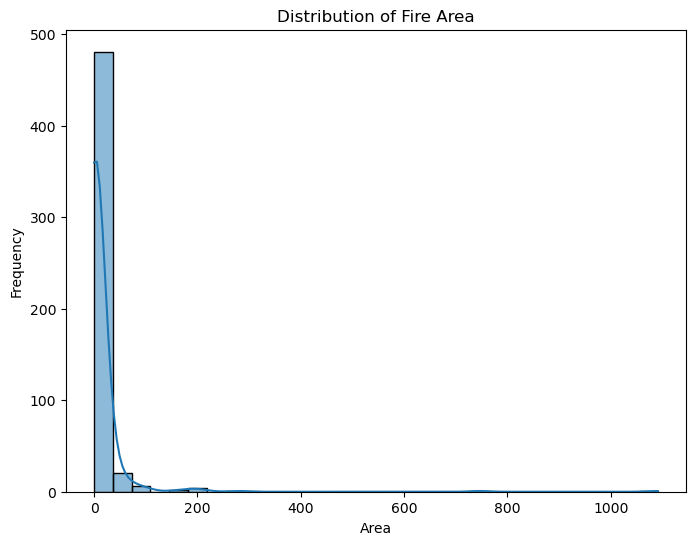

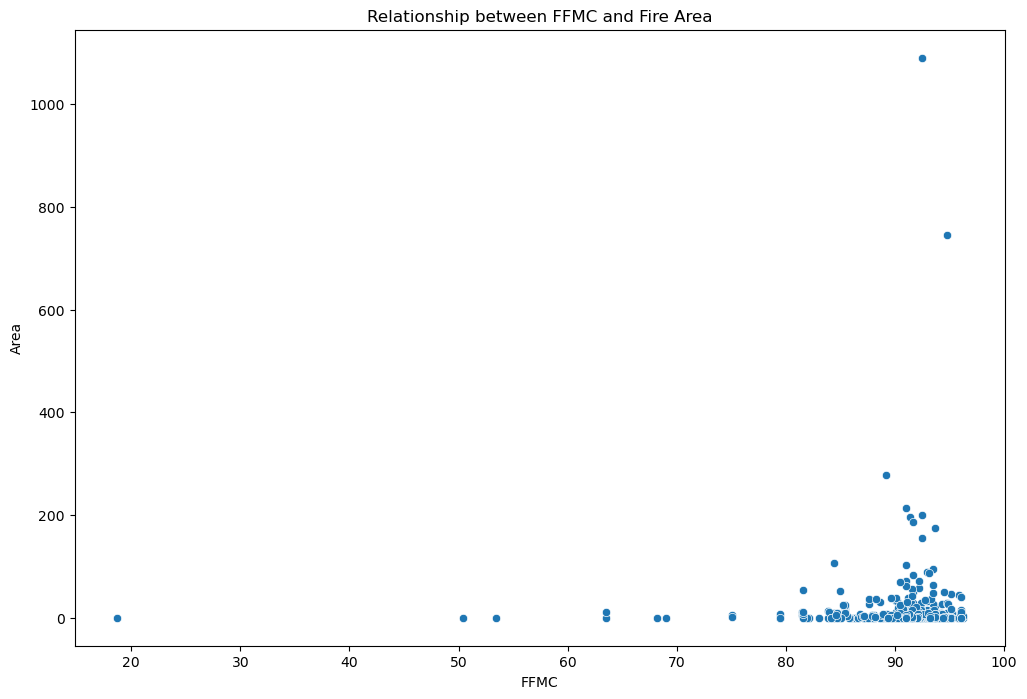

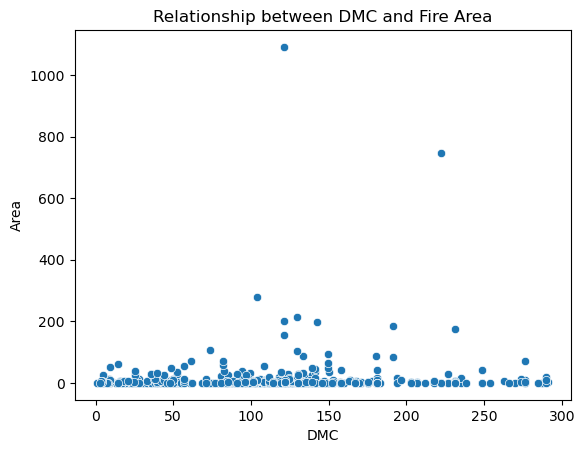

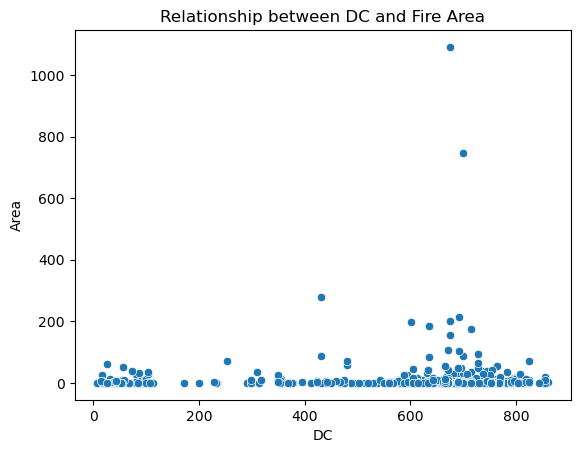

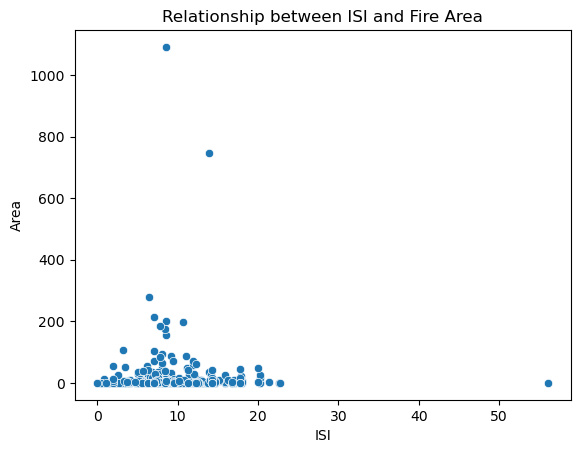

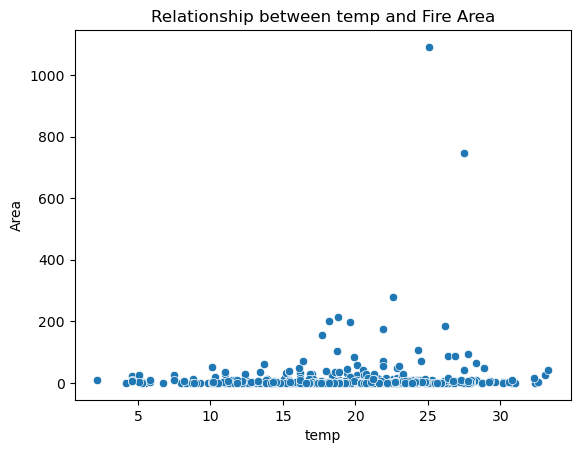

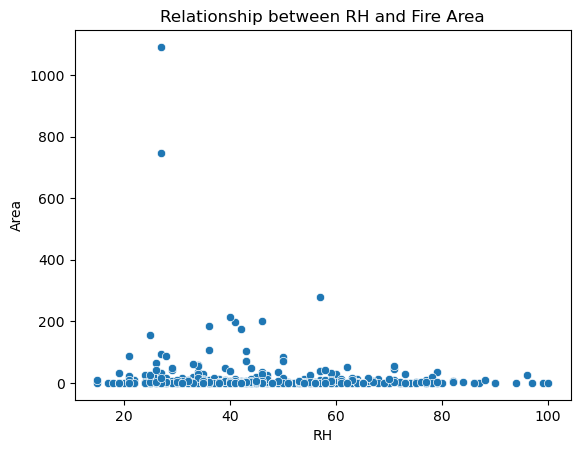

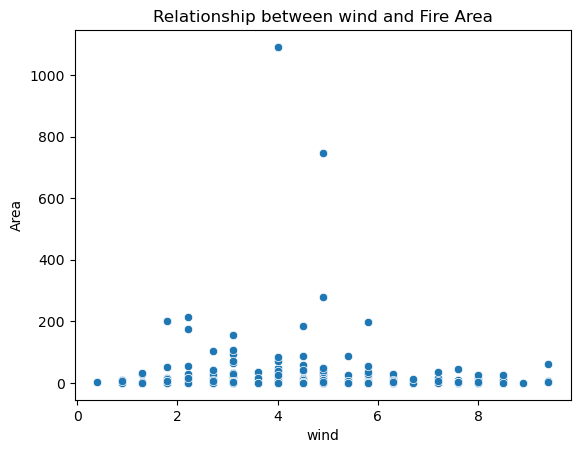

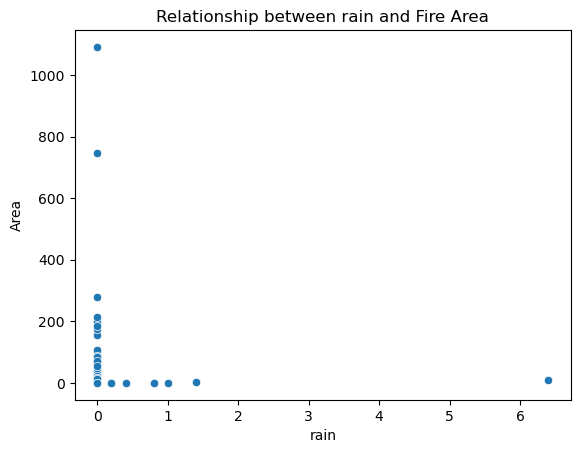

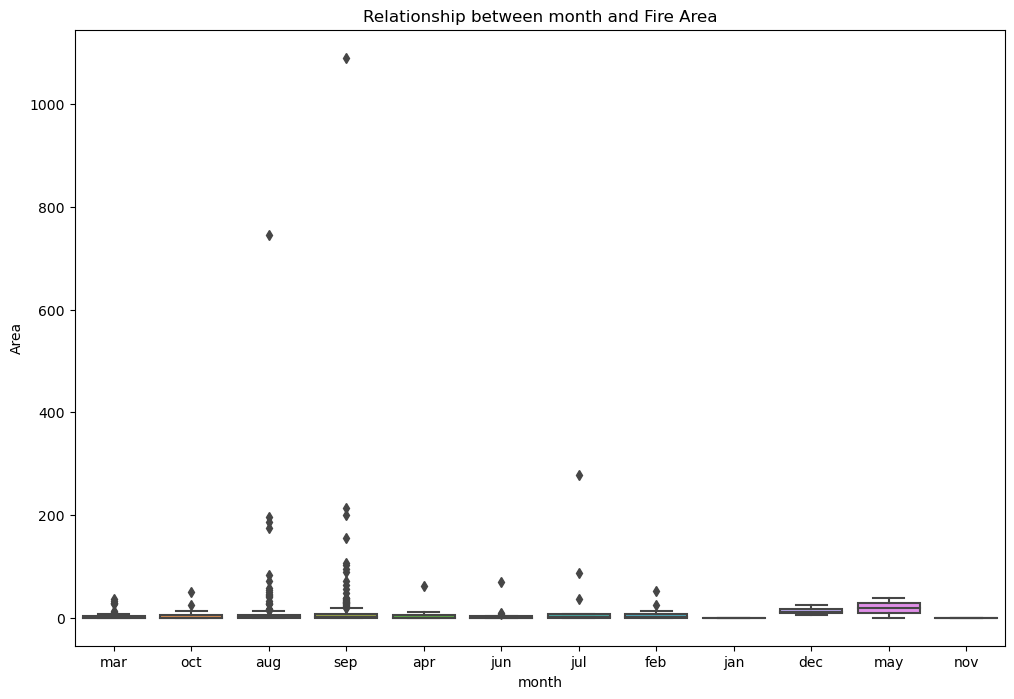

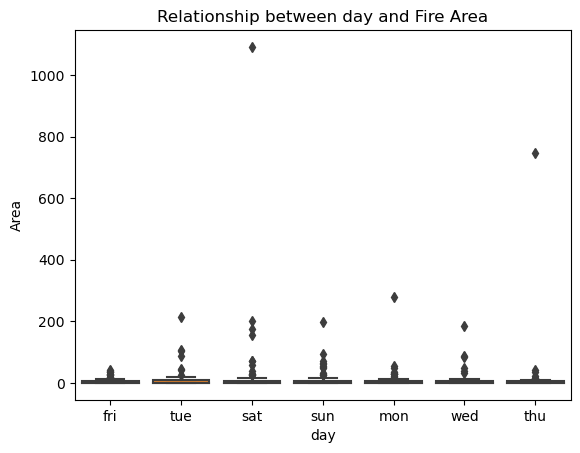



Epoch 1/50

11/11 [==============================] - 1s 13ms/step - loss: 2584.2664 - val_loss: 619.2288
Epoch 2/50
11/11 [==============================] - 0s 3ms/step - loss: 2572.5205 - val_loss: 613.3295
Epoch 3/50
11/11 [==============================] - 0s 3ms/step - loss: 2559.7363 - val_loss: 606.7762
Epoch 4/50
11/11 [==============================] - 0s 3ms/step - loss: 2545.3574 - val_loss: 599.8357
Epoch 5/50
11/11 [==============================] - 0s 3ms/step - loss: 2528.6482 - val_loss: 594.6362
Epoch 6/50
11/11 [==============================] - 0s 3ms/step - loss: 2513.5793 - val_loss: 590.8305
Epoch 7/50
11/11 [==============================] - 0s 3ms/step - loss: 2493.9468 - val_loss: 589.9460
Epoch 8/50
11/11 [==============================] - 0s 3ms/step - loss: 2482.4294 - val_loss: 590.0678
Epoch 9/50
11/11 [==============================] - 0s 3ms/step - loss: 2465.1082 - val_loss: 592.8802
Epoch 10/50
11/11 [==============================] - 0s 4ms/step - lo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


df = pd.read_csv(r"C:\Users\Owner\OneDrive\Desktop\data science assingment\assignments\neural networks\forestfires.csv")


for column in df.columns:
    print(f"Unique values in '{column}' column:", df[column].unique())


print(df.describe())


print(df.isnull().sum())


plt.figure(figsize=(8, 6))
sns.histplot(df['area'], bins=30, kde=True)
plt.title('Distribution of Fire Area')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(12, 8))
for feature in ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']:
    sns.scatterplot(x=feature, y='area', data=df)
    plt.title(f'Relationship between {feature} and Fire Area')
    plt.xlabel(feature)
    plt.ylabel('Area')
    plt.show()


plt.figure(figsize=(12, 8))
for feature in ['month', 'day']:
    sns.boxplot(x=feature, y='area', data=df)
    plt.title(f'Relationship between {feature} and Fire Area')
    plt.xlabel(feature)
    plt.ylabel('Area')
    plt.show()


X = df.drop(['area', 'size_category'], axis=1)
y = df['area']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


numeric_features = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']
ordinal_categorical_features = ['month', 'day']
numeric_transformer = StandardScaler()
ordinal_categorical_transformer = OneHotEncoder()


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('ord_cat', ordinal_categorical_transformer, ordinal_categorical_features)
    ], remainder='passthrough')


X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)


y_train = np.array(y_train)
y_test = np.array(y_test)


model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))


model.compile(loss='mean_squared_error', optimizer='adam')


history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)


mse = model.evaluate(X_test_scaled, y_test)
print(f"Mean Squared Error on Test Set: {mse}")